<a href="https://colab.research.google.com/github/puaqieshang/demi-laut-ai/blob/main/YOLOv5_Tutorial_Fish_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://user-images.githubusercontent.com/26833433/98702494-b71c4e80-237a-11eb-87ed-17fcd6b3f066.jpg">

This notebook was written by Ultralytics LLC, and is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/). 
For more information please visit https://github.com/ultralytics/yolov5 and https://www.ultralytics.com.

# Setup

Clone repo, install dependencies and check PyTorch and GPU.

In [1]:
!git clone https://github.com/puaqieshang/yolov5.git  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies
%pip install -qr requirements.txt wandb  # install

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.8.1+cu101 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
!unzip -uq "/content/drive/MyDrive/AI Startup/Models/Fish Count and Recognition/Fish.v1-416x416.yolov5pytorch.zip"


# Train 

In [ ]:
# !python train.py --img 640 --batch 16 --epochs 20 --data fish.yml --weights yolov5m.pt

!python train.py --img 640 --batch 64 --epochs 200 --data fish.yml --name "trial-26-05" --weights '' --cfg /content/yolov5/models/yolov5s.yaml
# !python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/
# Image(filename='runs/detect/exp2/bus.jpg', width=600)

github: up to date with https://github.com/puaqieshang/yolov5 ✅
YOLOv5 🚀 v5.0-13-g47a6634 torch 1.8.1+cu101 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=64, bbox_interval=-1, bucket='', cache_images=False, cfg='/content/yolov5/models/yolov5s.yaml', data='./data/fish.yml', device='', entity=None, epochs=200, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='trial-26-05', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/trial-26-05', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=64, upload_dataset=False, weights='', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-05-26 09:01:59.160954: I tensorflow/stream_executor/platfo

# 1. Inference

`detect.py` runs inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases).

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/trial1/weights/last.pt --img 640 --conf 0.01 --source ./val/images

Results are saved to `runs/detect`. A full list of available inference sources:
<img src="https://user-images.githubusercontent.com/26833433/98274798-2b7a7a80-1f94-11eb-91a4-70c73593e26b.jpg" width="900"> 

# 2. Test
Test a model on [COCO](https://cocodataset.org/#home) val or test-dev dataset to evaluate trained accuracy. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). To show results by class use the `--verbose` flag. Note that `pycocotools` metrics may be 1-2% better than the equivalent repo metrics, as is visible below, due to slight differences in mAP computation.

In [ ]:
# Run YOLOv5x on COCO val2017
!python test.py --weights /content/yolov5/runs/train/trial1/weights/last.pt --data fish.yml --img 640 --iou 0.65

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='./data/fish.yml', device='', exist_ok=False, img_size=640, iou_thres=0.65, name='exp', project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', verbose=False, weights=['/content/yolov5/runs/train/trial0/weights/last.pt'])
YOLOv5 🚀 v5.0-13-g47a6634 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Traceback (most recent call last):
  File "test.py", line 325, in <module>
    save_conf=opt.save_conf,
  File "test.py", line 56, in test
    model = attempt_load(weights, map_location=device)  # load FP32 model
  File "/content/yolov5/models/experimental.py", line 118, in attempt_load
    ckpt = torch.load(w, map_location=map_location)  # load
  File "/usr/local/lib/python3.7/dist-packages/torch/serialization.py", line 579, in load
    with _open_file_like(f, 'rb') as opened_file:
  File "/usr/local/lib/python3.7/dist-packages/torch/serialization.py", line 230, in _op

# 3. Visualize

## Weights & Biases Logging 🌟 NEW

[Weights & Biases](https://wandb.ai/site?utm_campaign=repo_yolo_notebook) (W&B) is now integrated with YOLOv5 for real-time visualization and cloud logging of training runs. This allows for better run comparison and introspection, as well improved visibility and collaboration for teams. To enable W&B `pip install wandb`, and then train normally (you will be guided through setup on first use). 

During training you will see live updates at [https://wandb.ai/home](https://wandb.ai/home?utm_campaign=repo_yolo_notebook), and you can create and share detailed [Reports](https://wandb.ai/glenn-jocher/yolov5_tutorial/reports/YOLOv5-COCO128-Tutorial-Results--VmlldzozMDI5OTY) of your results. For more information see the [YOLOv5 Weights & Biases Tutorial](https://github.com/ultralytics/yolov5/issues/1289). 

<img src="https://user-images.githubusercontent.com/26833433/98184457-bd3da580-1f0a-11eb-8461-95d908a71893.jpg" width="800">

## Local Logging

All results are logged by default to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc. View train and test jpgs to see mosaics, labels, predictions and augmentation effects. Note a **Mosaic Dataloader** is used for training (shown below), a new concept developed by Ultralytics and first featured in [YOLOv4](https://arxiv.org/abs/2004.10934).

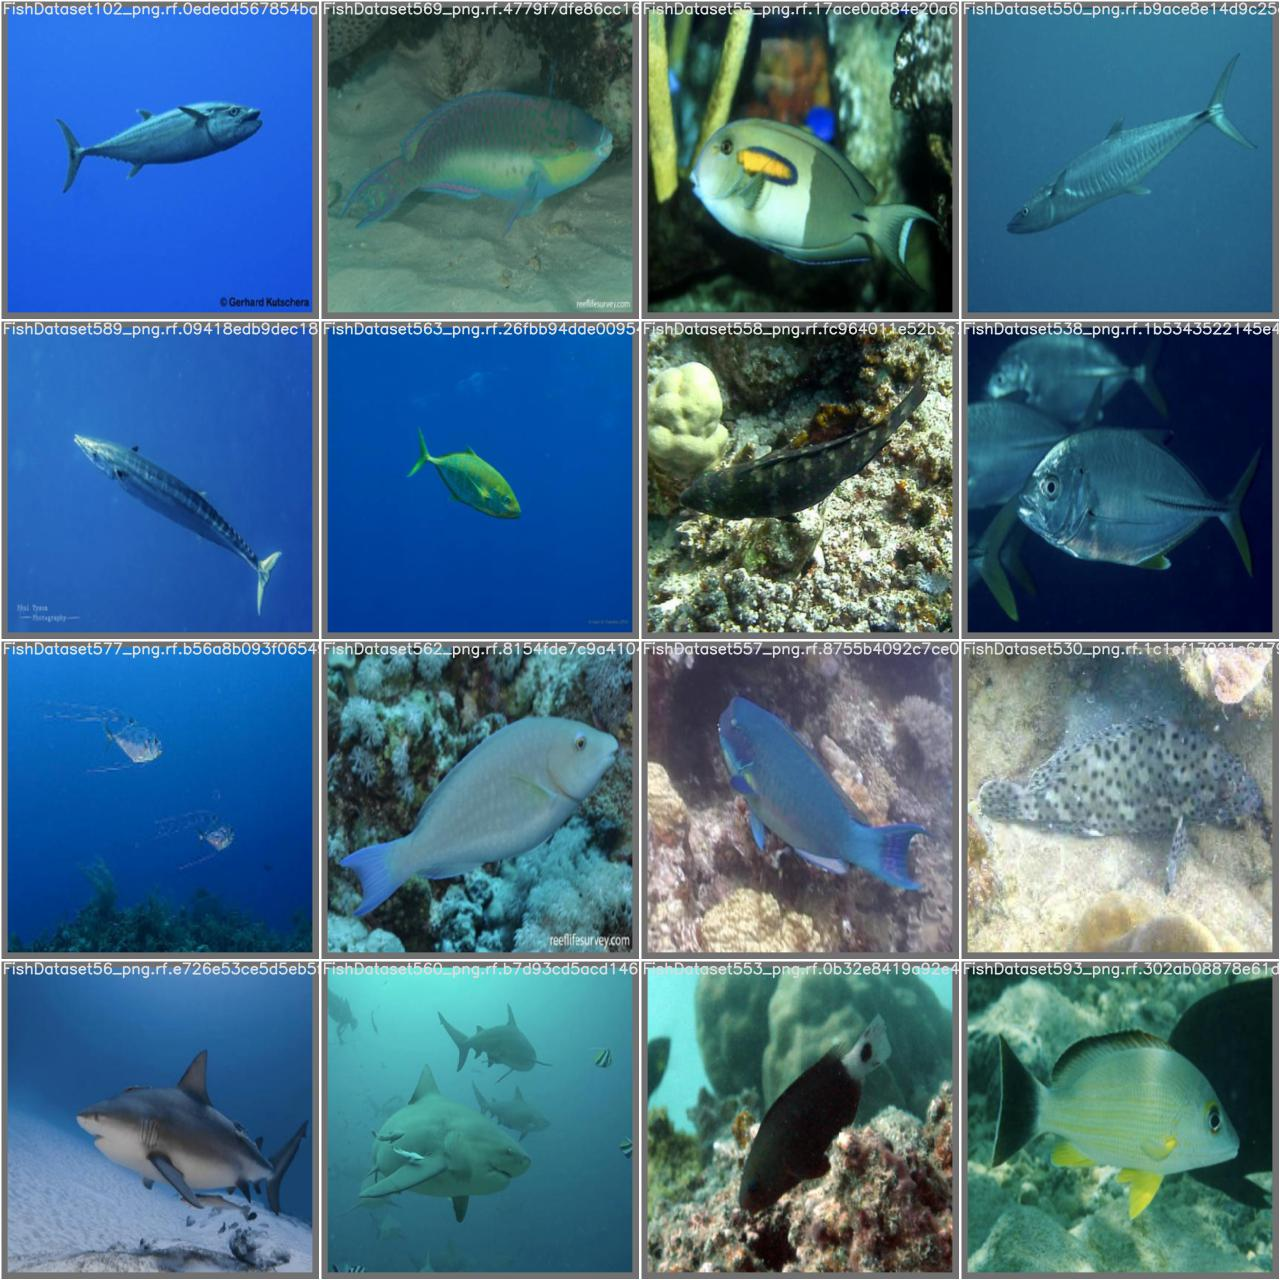

In [ ]:
Image(filename='runs/train/exp/train_batch0.jpg', width=800)  # train batch 0 mosaics and labels
Image(filename='runs/train/exp/test_batch0_labels.jpg', width=800)  # test batch 0 labels
Image(filename='runs/train/exp/test_batch0_pred.jpg', width=800)  # test batch 0 predictions

Training losses and performance metrics are also logged to [Tensorboard](https://www.tensorflow.org/tensorboard) and a custom `results.txt` logfile which is plotted as `results.png` (below) after training completes. Here we show YOLOv5s trained on COCO128 to 300 epochs, starting from scratch (blue), and from pretrained `--weights yolov5s.pt` (orange).

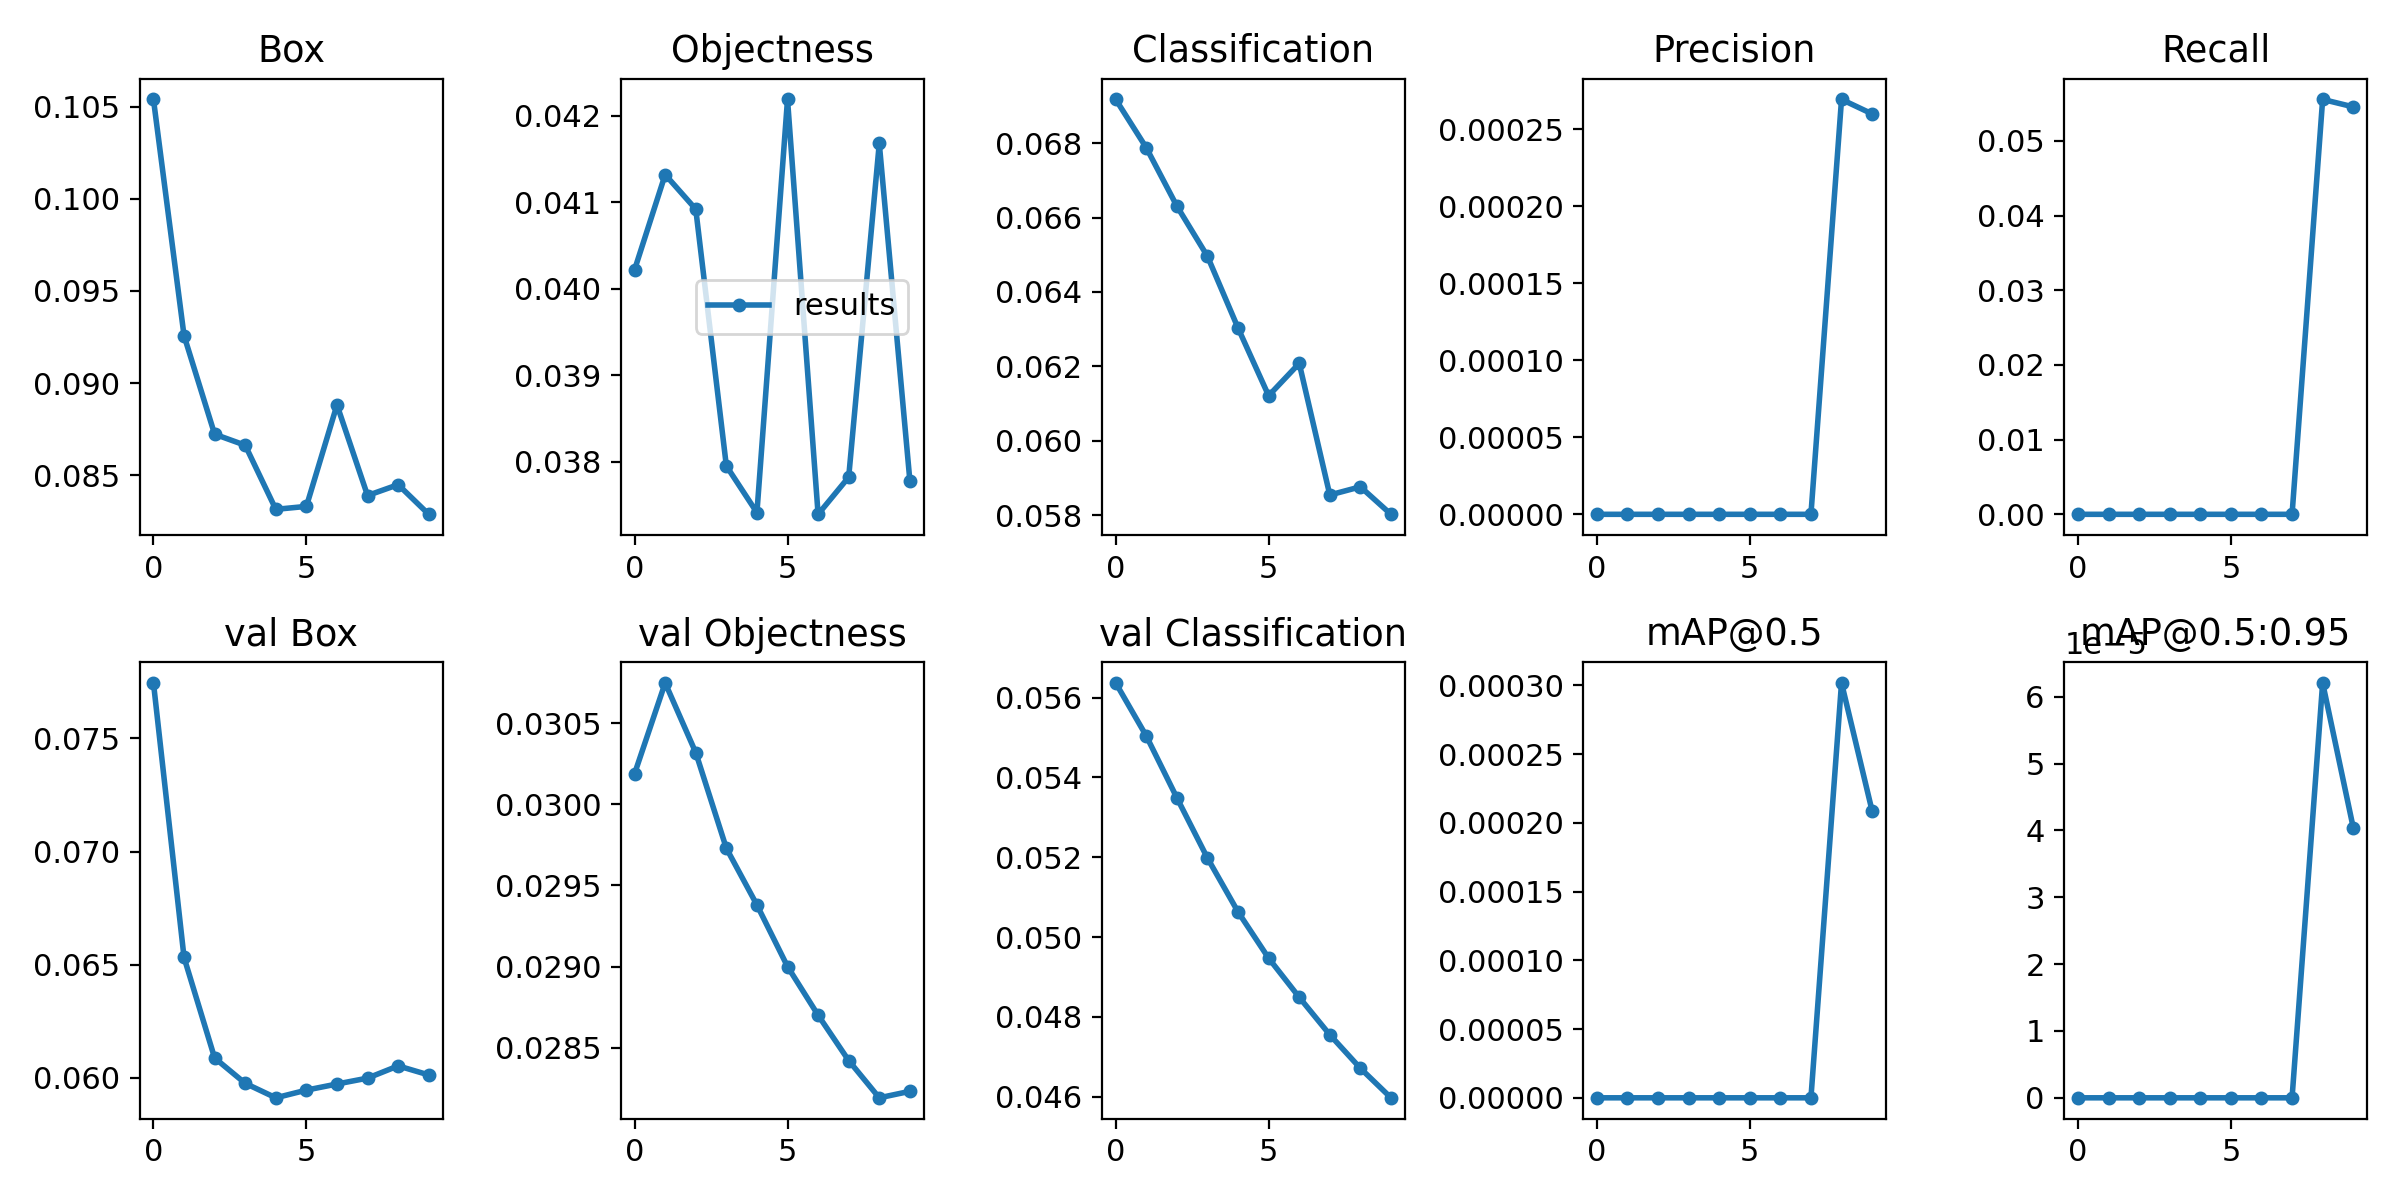

In [ ]:
from utils.plots import plot_results 
plot_results(save_dir='runs/train/trial1')  # plot all results*.txt as results.png
Image(filename='runs/train/trial1/results.png', width=800)

In [ ]:
! git init
! git add .
! git commit 

# Environments

YOLOv5 may be run in any of the following up-to-date verified environments (with all dependencies including [CUDA](https://developer.nvidia.com/cuda)/[CUDNN](https://developer.nvidia.com/cudnn), [Python](https://www.python.org/) and [PyTorch](https://pytorch.org/) preinstalled):

- **Google Colab and Kaggle** notebooks with free GPU: <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a> <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
- **Google Cloud** Deep Learning VM. See [GCP Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/GCP-Quickstart)
- **Amazon** Deep Learning AMI. See [AWS Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/AWS-Quickstart)
- **Docker Image**. See [Docker Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/Docker-Quickstart) <a href="https://hub.docker.com/r/ultralytics/yolov5"><img src="https://img.shields.io/docker/pulls/ultralytics/yolov5?logo=docker" alt="Docker Pulls"></a>


# Status

![CI CPU testing](https://github.com/ultralytics/yolov5/workflows/CI%20CPU%20testing/badge.svg)

If this badge is green, all [YOLOv5 GitHub Actions](https://github.com/ultralytics/yolov5/actions) Continuous Integration (CI) tests are currently passing. CI tests verify correct operation of YOLOv5 training ([train.py](https://github.com/ultralytics/yolov5/blob/master/train.py)), testing ([test.py](https://github.com/ultralytics/yolov5/blob/master/test.py)), inference ([detect.py](https://github.com/ultralytics/yolov5/blob/master/detect.py)) and export ([export.py](https://github.com/ultralytics/yolov5/blob/master/models/export.py)) on MacOS, Windows, and Ubuntu every 24 hours and on every commit.


# Appendix

Optional extras below. Unit tests validate repo functionality and should be run on any PRs submitted.


In [ ]:
# Re-clone repo
%cd ..
%rm -rf yolov5 && git clone https://github.com/ultralytics/yolov5
%cd yolov5

/
Cloning into 'yolov5'...
remote: Enumerating objects: 6197, done.
remote: Counting objects: 100% (217/217), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 6197 (delta 130), reused 146 (delta 92), pack-reused 5980
Receiving objects: 100% (6197/6197), 8.71 MiB | 35.67 MiB/s, done.
Resolving deltas: 100% (4222/4222), done.
/yolov5


In [ ]:
# Reproduce
for x in 'yolov5s', 'yolov5m', 'yolov5l', 'yolov5x':
  !python test.py --weights {x}.pt --data coco.yaml --img 640 --conf 0.25 --iou 0.45  # speed
  !python test.py --weights {x}.pt --data coco.yaml --img 640 --conf 0.001 --iou 0.65  # mAP

Streaming output truncated to the last 5000 lines.
val: WARNING: Ignoring corrupted image and/or label ../coco/images/val2017/000000012062.jpg: [Errno 2] No such file or directory: '../coco/images/val2017/000000012062.jpg'
val: WARNING: Ignoring corrupted image and/or label ../coco/images/val2017/000000012120.jpg: [Errno 2] No such file or directory: '../coco/images/val2017/000000012120.jpg'
val: WARNING: Ignoring corrupted image and/or label ../coco/images/val2017/000000012280.jpg: [Errno 2] No such file or directory: '../coco/images/val2017/000000012280.jpg'
val: WARNING: Ignoring corrupted image and/or label ../coco/images/val2017/000000012576.jpg: [Errno 2] No such file or directory: '../coco/images/val2017/000000012576.jpg'
val: WARNING: Ignoring corrupted image and/or label ../coco/images/val2017/000000012639.jpg: [Errno 2] No such file or directory: '../coco/images/val2017/000000012639.jpg'
val: WARNING: Ignoring corrupted image and/or label ../coco/images/val2017/000000012667.j

In [ ]:
# PyTorch Hub
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Images
dir = 'https://github.com/ultralytics/yolov5/raw/master/data/images/'
imgs = [dir + f for f in ('zidane.jpg', 'bus.jpg')]  # batch of images

# Inference
results = model(imgs)
results.print()  # or .show(), .save()

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


Fusing layers... 



requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



Model Summary: 224 layers, 7266973 parameters, 0 gradients
Adding autoShape... 
YOLOv5 🚀 2021-5-7 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)



image 1/2: 720x1280 2 persons, 2 ties
image 2/2: 1080x810 4 persons, 1 bus
Speed: 247.9ms pre-process, 11.9ms inference, 6.0ms NMS per image at shape (2, 3, 640, 640)


In [ ]:
# Unit tests
%%shell
export PYTHONPATH="$PWD"  # to run *.py. files in subdirectories

rm -rf runs  # remove runs/
for m in yolov5s; do  # models
  python train.py --weights $m.pt --epochs 3 --img 320 --device 0  # train pretrained
  python train.py --weights '' --cfg $m.yaml --epochs 3 --img 320 --device 0  # train scratch
  for d in 0 cpu; do  # devices
    python detect.py --weights $m.pt --device $d  # detect official
    python detect.py --weights runs/train/exp/weights/best.pt --device $d  # detect custom
    python test.py --weights $m.pt --device $d # test official
    python test.py --weights runs/train/exp/weights/best.pt --device $d # test custom
  done
  python hubconf.py  # hub
  python models/yolo.py --cfg $m.yaml  # inspect
  python models/export.py --weights $m.pt --img 640 --batch 1  # export
done

github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-70-g3ef3a95 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='', data='data/coco128.yaml', device='0', entity=None, epochs=3, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[320, 320], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, weights='yolov5s.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-05-07 10:21:15.717194: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dyna

In [ ]:
# Profile
from utils.torch_utils import profile 

m1 = lambda x: x * torch.sigmoid(x)
m2 = torch.nn.SiLU()
profile(x=torch.randn(16, 3, 640, 640), ops=[m1, m2], n=100)

1.8.1+cu101 cuda _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)

      Params      GFLOPS    forward (ms)   backward (ms)                   input                  output
           0           0           1.645           4.486       (16, 3, 640, 640)       (16, 3, 640, 640)
           0           0          0.7111           1.946       (16, 3, 640, 640)       (16, 3, 640, 640)


In [ ]:
# Evolve
!python train.py --img 640 --batch 64 --epochs 100 --data coco128.yaml --weights yolov5s.pt --cache --noautoanchor --evolve
!d=runs/train/evolve && cp evolve.* $d && zip -r evolve.zip $d && gsutil mv evolve.zip gs://bucket  # upload results (optional)

github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-70-g3ef3a95 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=64, bbox_interval=-1, bucket='', cache_images=True, cfg='', data='./data/coco128.yaml', device='', entity=None, epochs=100, evolve=True, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='evolve', noautoanchor=True, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/evolve', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=64, upload_dataset=False, weights='yolov5s.pt', workers=8, world_size=1)
Traceback (most recent call last):
  File "train.py", line 613, in <module>
    hyp[k] = max(hyp[k], v[1])  # lower limit
KeyError: 'anchors'
cp: cannot stat 'evolve.*': No such file or directory


In [ ]:
# VOC
for b, m in zip([64, 48, 32, 16], ['yolov5s', 'yolov5m', 'yolov5l', 'yolov5x']):  # zip(batch_size, model)
  !python train.py --batch {b} --weights {m}.pt --data voc.yaml --epochs 50 --cache --img 512 --nosave --hyp hyp.finetune.yaml --project VOC --name {m}

In [ ]:
names= [ 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
         'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
         'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
         'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
         'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
         'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
         'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
         'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
         'hair drier', 'toothbrush', 'fish' ]
len(names)